Email report with embedded Graphs
=========================================

LORD Sensing Systems
--------------------

In [6]:
import numpy as np
from scipy import signal
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import cm, colors, pyplot, dates
import matplotlib.pyplot as plt
from MathEngine import FFT as meFFT
import pylab as pl

#settings for plots
matplotlib.rcParams['figure.figsize'] = (12,5)
matplotlib.rcParams['savefig.dpi'] = 100

Get the last five minutes of data from SensorCloud
---------------------------------------------------

In [3]:
#create a repo object for the device
repo = TimeSeriesRepo('DEVICE_ID')
#pull all time-series streams for the desired channel
allSeries = repo.getAllTimeSeries( 'SENSOR_NAME', 'CHANNEL_NAME')
#assuming single series 
series = allSeries[0]
lastTimestamp = series[-1][0]

#using the lastTimestamp, calculate the start time for the range (5 minutes ago)
#five minutes in nano seconds
FIVE_MIN_NANO = NANO_PER_SEC * 300
startTimestamp = lastTimestamp - FIVE_MIN_NANO

#now fetch series in the given time range
allSeries = repo.getAllTimeSeries( 'SENSOR_NAME', 'CHANNEL_NAME', startTime=startTimestamp, endTime=lastTimestamp)
series = allSeries[0]

In [4]:
times = np.array(series.getTimeStamps())
data = np.array(series.getData())

In [5]:
#convert timestamps into relative seconds for plotting
start = times[0]
times = (times - start)/float(NANO_PER_SEC)

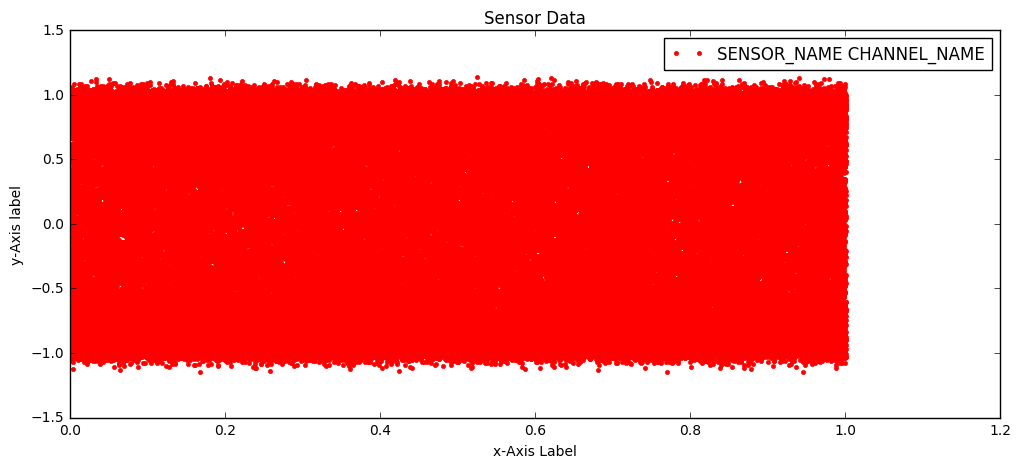

In [7]:
#generate a plot with times on the x axis, data on the y, using red dots, and the name of the 
plt.plot(times, data, '.r', label='SENSOR_NAME CHANNEL_NAME')
plt.xlabel('x-Axis Label')
plt.ylabel('y-Axis label')
plt.title('Sensor Data')
pl.legend(loc='upper right')      
#save the plot to a file called "local.png"
plt.savefig('local.png', dpi = 100) 

Emailing The Image
=======================
Generating the message
-----------------------

In [8]:

from email.mime.image import MIMEImage
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Load the image we saved as binary string
img_data = open('local.png', 'rb').read()

# Create a "related" message container that will hold the HTML 
msg = MIMEMultipart(_subtype='related')

# Create the body with HTML. Note that the image, since it is inline, is 
# referenced with the URL cid:myimage

emailcontent = ''

emailcontent += '<p><img src="http://sensorcloud.com/static/img/logos/sc_powered_logo.png"></p><br>'
emailcontent += '<h1>MathEngine Email Demo</h1>'
emailcontent += '<p><img src="cid:MathEnginePlot" /></p>'
emailcontent += '<p>This image and email was generated using MathEngine!</p>'
msg.attach(MIMEText(emailcontent, _subtype='html'))

# Now create the MIME container for the images
img = MIMEImage(img_data, 'png')
img.add_header('Content-Id', '<MathEnginePlot>')  # angle brackets are important
msg.attach(img)



## Sending the message

In [ ]:
import smtplib

email_from = "FROM_ADDRESS"
email_to = "SEND_ADDRESS"
email_subject = "SUBJECT"
smtp_server = "SMTP_SERVER"
smtp_port = 587  
smtp_username = "SMTP_USER"
smtp_password = "SMTP_PASSWORD"

server = smtplib.SMTP(smtp_server, smtp_port)
server.starttls()
server.login(smtp_username, smtp_password)

msg["From"] = email_from
msg["Subject"] = email_subject
msg["To"] = email_to

server.sendmail(email_from, email_to, msg.as_string())